In [ ]:
%cd D:/Documents/Escuela/SEEL/Research_Final

D:\Documents\Escuela\SEEL\Research_Final


In [ ]:
import os
import numpy as np
import random
import pandas as pd

# For the plots
import matplotlib.pyplot as plt

In [ ]:
from DatasetLoader_mine2 import DatasetLoader

parent = 'multipletimeseriesforecasting/preprocessed-data/'

path = os.path.join(parent, 'MetroInterstateTrafficVolume/Metro_Interstate_Traffic_Volume.csv.gz')

dl = DatasetLoader('MetroInterstateTrafficVolume', path)

matrix_1_original = dl.dataset_load_and_preprocess("original")
matrix_1_norm = dl.dataset_load_and_preprocess("normalized")
print(matrix_1_norm.shape)

---------------------------------------------------
Dataset name:  MetroInterstateTrafficVolume
Dataset contains missing values?  False
--------------------------
---------------------------------------------------
Dataset name:  MetroInterstateTrafficVolume
Dataset contains missing values?  False
--------------------------
(1, 48204)


In [ ]:
sample_len = 1000
print("Sample_len total", sample_len)

np.random.seed(6)
sets = np.random.choice(matrix_1_norm.shape[1]-40, int(sample_len), replace=False)
sets_training, sets_testing = sets[:int(len(sets)*.8)], sets[int(len(sets)*.8):]
print(sets_training, sets_testing)

### Model HD

In [ ]:
from RegHD import Return_Model as Return_Model_HD, Train_Model as Train_HD, Test_Model as Test_HD

model_hd = Return_Model_HD()
model_hd, train_arr = Train_HD(model_hd, matrix_1_norm, sets_training)
#model_hd, dif_hd = Test_HD(model_hd, matrix_1_norm, sets_testing)
model_hd, pred_hd, orig_hd = Test_HD(model_hd, matrix_1_norm, sets_testing)

In [ ]:
y = list(range(0,len(pred_hd)))
plt.plot(y, pred_hd, "-")
plt.plot(y, orig_hd, "-")
plt.legend(["Pred", 'Orig'])
#plt.xlim(0,200)
plt.show()

### Model DNN

In [ ]:
from DNN import Return_Model as Return_Model_DNN, Train_Model as Train_DNN, Test_Model as Test_DNN

model_dnn = Return_Model_DNN()
model_dnn, train_arr = Train_DNN(model_dnn, matrix_1_norm, sets_training, retraining=False, dataset=6)
model_dnn, dif_dnn = Test_DNN(model_dnn, matrix_1_norm, sets_testing)

### Model VAE

In [ ]:
from VAE import Return_Model as Return_Model_VAE, Train_Model as Train_VAE, Test_Model as Test_VAE

vae, enc, dec, es = Return_Model_VAE()
vae, enc, dec, es = Train_VAE(vae, es, matrix_1_norm, sets_training, retraining=False, dataset = 6)
model_vae, dif_vae = Test_VAE(vae, matrix_1_norm, sets_testing)

[0.15448278, 0.16697503345222262, 0.10600201512784166]
[0.108133726, 0.14056451713960508, 0.09865254504433703]


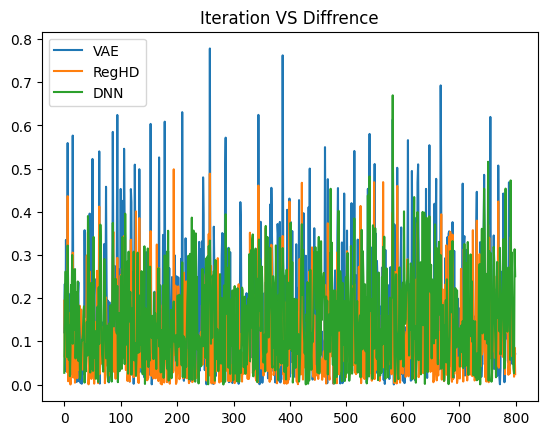

In [45]:
y = list(range(0,len(dif_dnn)))
dnn = [num[0][0] for num in dif_dnn]
vae = [num[0] for num in dif_vae]
reghd = [num.item() for num in dif_hd]

mean = [np.mean(dnn)] + [np.mean(vae)] + [np.mean(reghd)]
std = [np.std(dnn)] + [np.std(vae)] + [np.std(reghd)]
print(mean)
print(std)

#for i in range(len(vae)):
 #   if vae[i] > 0.7:
  #      vae[i] = 0.7


plt.title("Iteration VS Diffrence")
plt.plot(y, vae, "-")
plt.plot(y, reghd, "-")
plt.plot(y, dnn, "-")
plt.legend(["VAE", 'RegHD', "DNN"])
#plt.xlim(0,200)
plt.show()

100

<img src="100 - test.jpg" alt="Alternative text" />

500

<img src="500 - test.jpg" alt="Alternative text" />

1000

<img src="1000 - test.jpg" alt="Alternative text" />

2000

<img src="2000 - test.jpg" alt="Alternative text" />

3000

<img src="3000 - test.jpg" alt="Alternative text" />

4000

<img src="4000 - test.jpg" alt="Alternative text" />

5000

<img src="5000 - test.jpg" alt="Alternative text" />